# <center>Laboratorio 3</center>

#### ***Nombre***: Jose Eduardo Calderon Lopez
#### ***Carnet***: 14001764

<br>
<hr>
<br>

# Parte 1: Numpy

In [64]:
import numpy as np

### 1. Ejercicio

In [6]:
arrayBools = np.random.choice([True, False], size=1000)

print("¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?")
print(f"Respuesta: {arrayBools.nbytes}")

¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?
Respuesta: 1000


### 2. Ejercicio

In [17]:
pares = np.arange(100,0,-2)

print(pares[40:])

[20 18 16 14 12 10  8  6  4  2]


### 3. Ejercicio

In [50]:
array = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2],[1,5,6,1]])

subarray1 = array[1]
subarray2 = array[[0,2],:][:,[0,2]]

print(subarray1)
print("")
print(subarray2)

[0 3 7 4]

[[2 5]
 [8 5]]


### 4. Ejercicio

In [48]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

media = np.mean(a-b)

print(f"Media aritmética de a-b:\n{media}")

Media aritmética de a-b:
-0.25


### 5. Ejercicio

In [75]:
coordenadas = np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])

coordenadas = np.append(coordenadas, [[37.1,-3.6]], axis=0)

print(coordenadas)

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


### 6. Ejercicio

In [87]:
transpose = np.transpose(coordenadas)

transpose = np.append(transpose, [[35.8],[12.0]], axis=1)

print(transpose)

[[ 1.33 30.   70.2  37.1  35.8 ]
 [ 4.5  10.7   0.5  -3.6  12.  ]]


# Parte 2: Exploración y Minería de Datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
datos = pd.read_csv('NucleosPoblacion.csv')

# datos.head()

### 1. Ejercicio

In [30]:
municipios = datos[datos['Poblacion'] > 100000]

print(f"Municipios con más de 100,000 habitantes\nRespuesta: {len(municipios)}")

Municipios con más de 100,000 habitantes
Respuesta: 62


### 2. Ejercicio

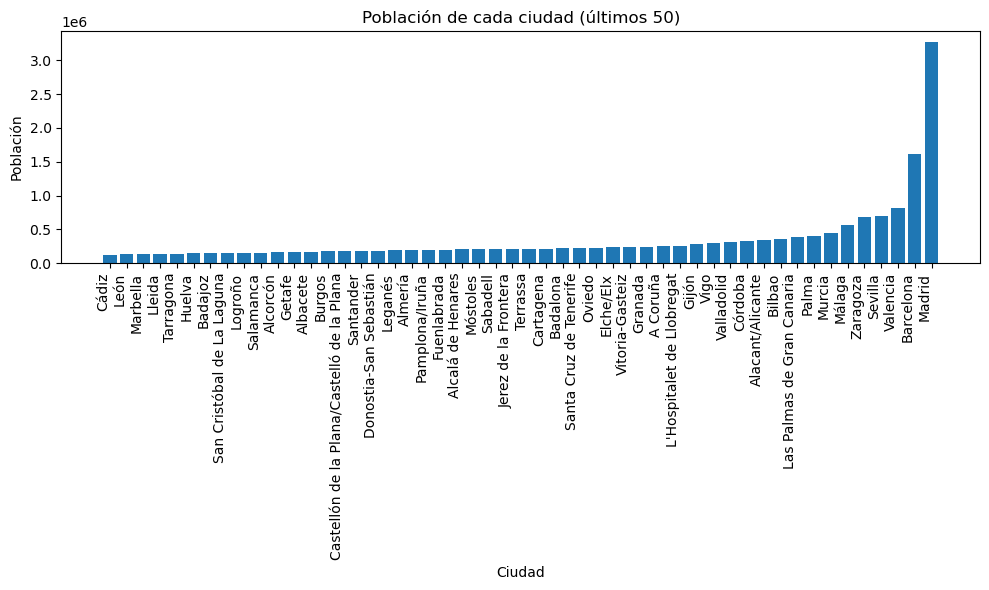

Nota: Solo se grafican los ultimos 50 por motivos visuales


a. ¿Cuál es la segunda ciudad más poblada?
Respuesta:  Barcelona

b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
Respuesta: 835



In [27]:

#Calculo de segunda ciudad mas poblada
ordenPorCiudad = datos.sort_values(by='Poblacion')
segundaCiudadMasPoblada = ordenPorCiudad.iloc[-2]['Municipio']

# Calculo de posicion de Granada en ranking
ordenPorCiudad = ordenPorCiudad.reset_index(drop=True)
posicionGranada = ordenPorCiudad[ordenPorCiudad['Municipio'] == 'Granada'].index[0] + 1

# Grafica de poblacion de cada ciudad, de menor a mayor
maxLenGrafica = 50
datosGrafica = ordenPorCiudad.tail(maxLenGrafica)
plt.figure(figsize=(10, 6))
plt.bar(datosGrafica['Municipio'], datosGrafica['Poblacion'])
plt.xlabel('Ciudad')
plt.ylabel('Población')
plt.title('Población de cada ciudad (últimos 50)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()
print(f"Nota: Solo se grafican los ultimos {maxLenGrafica} por motivos visuales\n")

print("\na. ¿Cuál es la segunda ciudad más poblada?")
print("Respuesta: ",segundaCiudadMasPoblada)

print("\nb. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?")
print(f"Respuesta: {posicionGranada}\n")

### 3. Ejercicio

In [29]:
masDe5000Extremadura = datos[((datos['Provincia'] == 'Cáceres') | (datos['Provincia'] == 'Badajoz')) & (datos['Poblacion'] > 5000)]
cantidad = len(masDe5000Extremadura)

print("¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?")
print(f"Respuesta: {cantidad}")

¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?
Respuesta: 14


### 4. Ejercicio

In [226]:
# display(datos.head())

orderY = datos.sort_values(by='Y').iloc[-1]
municipio = orderY['Municipio']
provincia = orderY['Provincia']
poblacion = orderY['Poblacion']

print("¿Cuál es el municipio situado más al Norte?")
print(f"Municipio: {municipio}")
print(f"Provincia: {provincia}")
print(f"Poblacion: {poblacion}")

¿Cuál es el municipio situado más al Norte?
Municipio: Viveiro
Provincia: Lugo
Poblacion: 16211.0


### 5. Ejercicio

In [241]:
municipiosGranada = datos[datos['Provincia'] == 'Granada']
descPoblacion = municipiosGranada['Poblacion'].describe()

print("Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada:")
print(f"Media: {descPoblacion['mean']}")
print(f"Mediana: {descPoblacion['50%']}")
print(f"Desviacion estandar: {descPoblacion['std']}")
print(f"Maximo: {descPoblacion['max']}")
print(f"Minimo: {descPoblacion['min']}")

Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada:
Media: 30217.85
Mediana: 17526.0
Desviacion estandar: 50355.49171459277
Maximo: 239154.0
Minimo: 10386.0


### 6. Ejercicio

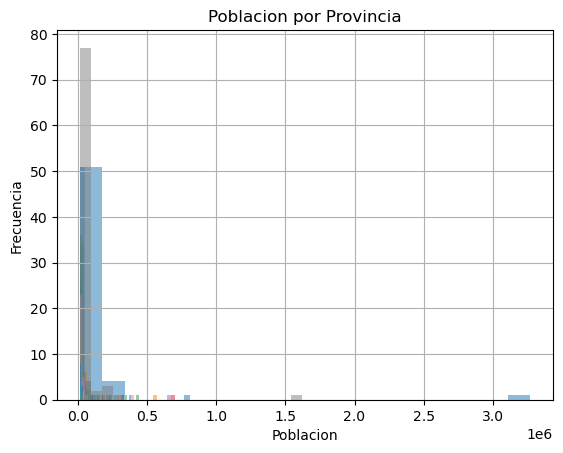

In [265]:
provincias = datos['Provincia'].unique()

for provincia in provincias:
    poblacion = datos[datos['Provincia'] == provincia]['Poblacion']
    plt.hist(poblacion, bins=20, alpha=0.5, label=provincia)

plt.title("Poblacion por Provincia")
plt.grid()
plt.xlabel('Poblacion')
plt.ylabel('Frecuencia')
# plt.legend()
plt.show()


### 7. Ejercicio

In [283]:
municipios = datos.sample(n=50, replace=False)
poblacion = municipios['Poblacion']

# display(municipios)
print(f"Promedio: {poblacion.mean()}")
print(f"Desviacion estandar: {poblacion.std()}")

Promedio: 35483.38
Desviacion estandar: 42761.34502900238


### 8. Ejercicio

In [329]:

def calcularDistancia(lat1,lon1,lat2,lon2):
    # radio Tierra en km
    R = 6371.0
    
    # grados a radianes
    lat1rad, lon1rad, lat2rad, lon2rad = map(np.radians, [lat1, lon1, lat2, lon2])
    
    diffLat = lat2rad - lat1rad
    diffLon = lon2rad - lon1rad
    
    a = np.sin(diffLat/2)**2 + np.cos(lat1rad) * np.cos(lat2rad) * np.sin(diffLon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distancia = R * c
    
    return distancia

# coordenadas de Madrid
coordMadrid = datos[datos['Municipio'] == 'Madrid'][['X','Y']]
coordMadridX = coordMadrid.loc[:,['X']].values[0][0]
coordMadridY = coordMadrid.loc[:,['Y']].values[0][0]

# Calcular distancia de cada municipio con Madrid
datos['distancia_madrid'] = datos.apply(lambda fila: calcularDistancia(coordMadridY,coordMadridX,fila['Y'], fila['X']), axis=1)

# Caluclar mas cercano (sin contar Madrid) y mas lejano
datosSinMadrid = datos.drop(datos[datos['Municipio'] == 'Madrid'].index)
masCercano = datosSinMadrid.loc[datosSinMadrid['distancia_madrid'].idxmin(), 'Municipio']
masLejano = datos.loc[datos['distancia_madrid'].idxmax(), 'Municipio']

print(f"Municipio más cercano: {masCercano}")
print(f"Municipio más lejano: {masLejano}")
    

Municipio más cercano: Pozuelo de Alarcón
Municipio más lejano: Los Llanos de Aridane
